In [1]:
import warnings

# 오류 경고 무시하기
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy import stats
from scipy.stats import f_oneway

# 한글 폰트 설정하기
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

display(train_df.head(3))
display(test_df.head(3))

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,36 months,8 years,MORTGAGE,132000000,19.64,12,주택 개선,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,36 months,5 years,RENT,89971200,15.84,25,부채 통합,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,36 months,6 years,RENT,150000000,8.41,20,신용 카드,0,1786980,281820.0,0.0,0.0


# EDA

In [4]:
train_df.isna().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
대출등급            0
dtype: int64

In [5]:
test_df.isna().sum()

ID              0
대출금액            0
대출기간            0
근로기간            0
주택소유상태          0
연간소득            0
부채_대비_소득_비율     0
총계좌수            0
대출목적            0
최근_2년간_연체_횟수    0
총상환원금           0
총상환이자           0
총연체금액           0
연체계좌수           0
dtype: int64

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


### 이산형 변수
* 대출기간, 근로기간, 주택소유상태, 대출목적, 대출등급
### 연속형 변수
* 대출금액, 연간소득, 부채_대비_소득_비율, 총계좌수, 최근_2년간_연체_횟수, 총상환원금, 총상환이자, 총연체금액, 연체계좌수
### * ID는 제외

In [8]:
train_df.근로기간.value_counts()

근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

<Axes: xlabel='대출등급', ylabel='count'>

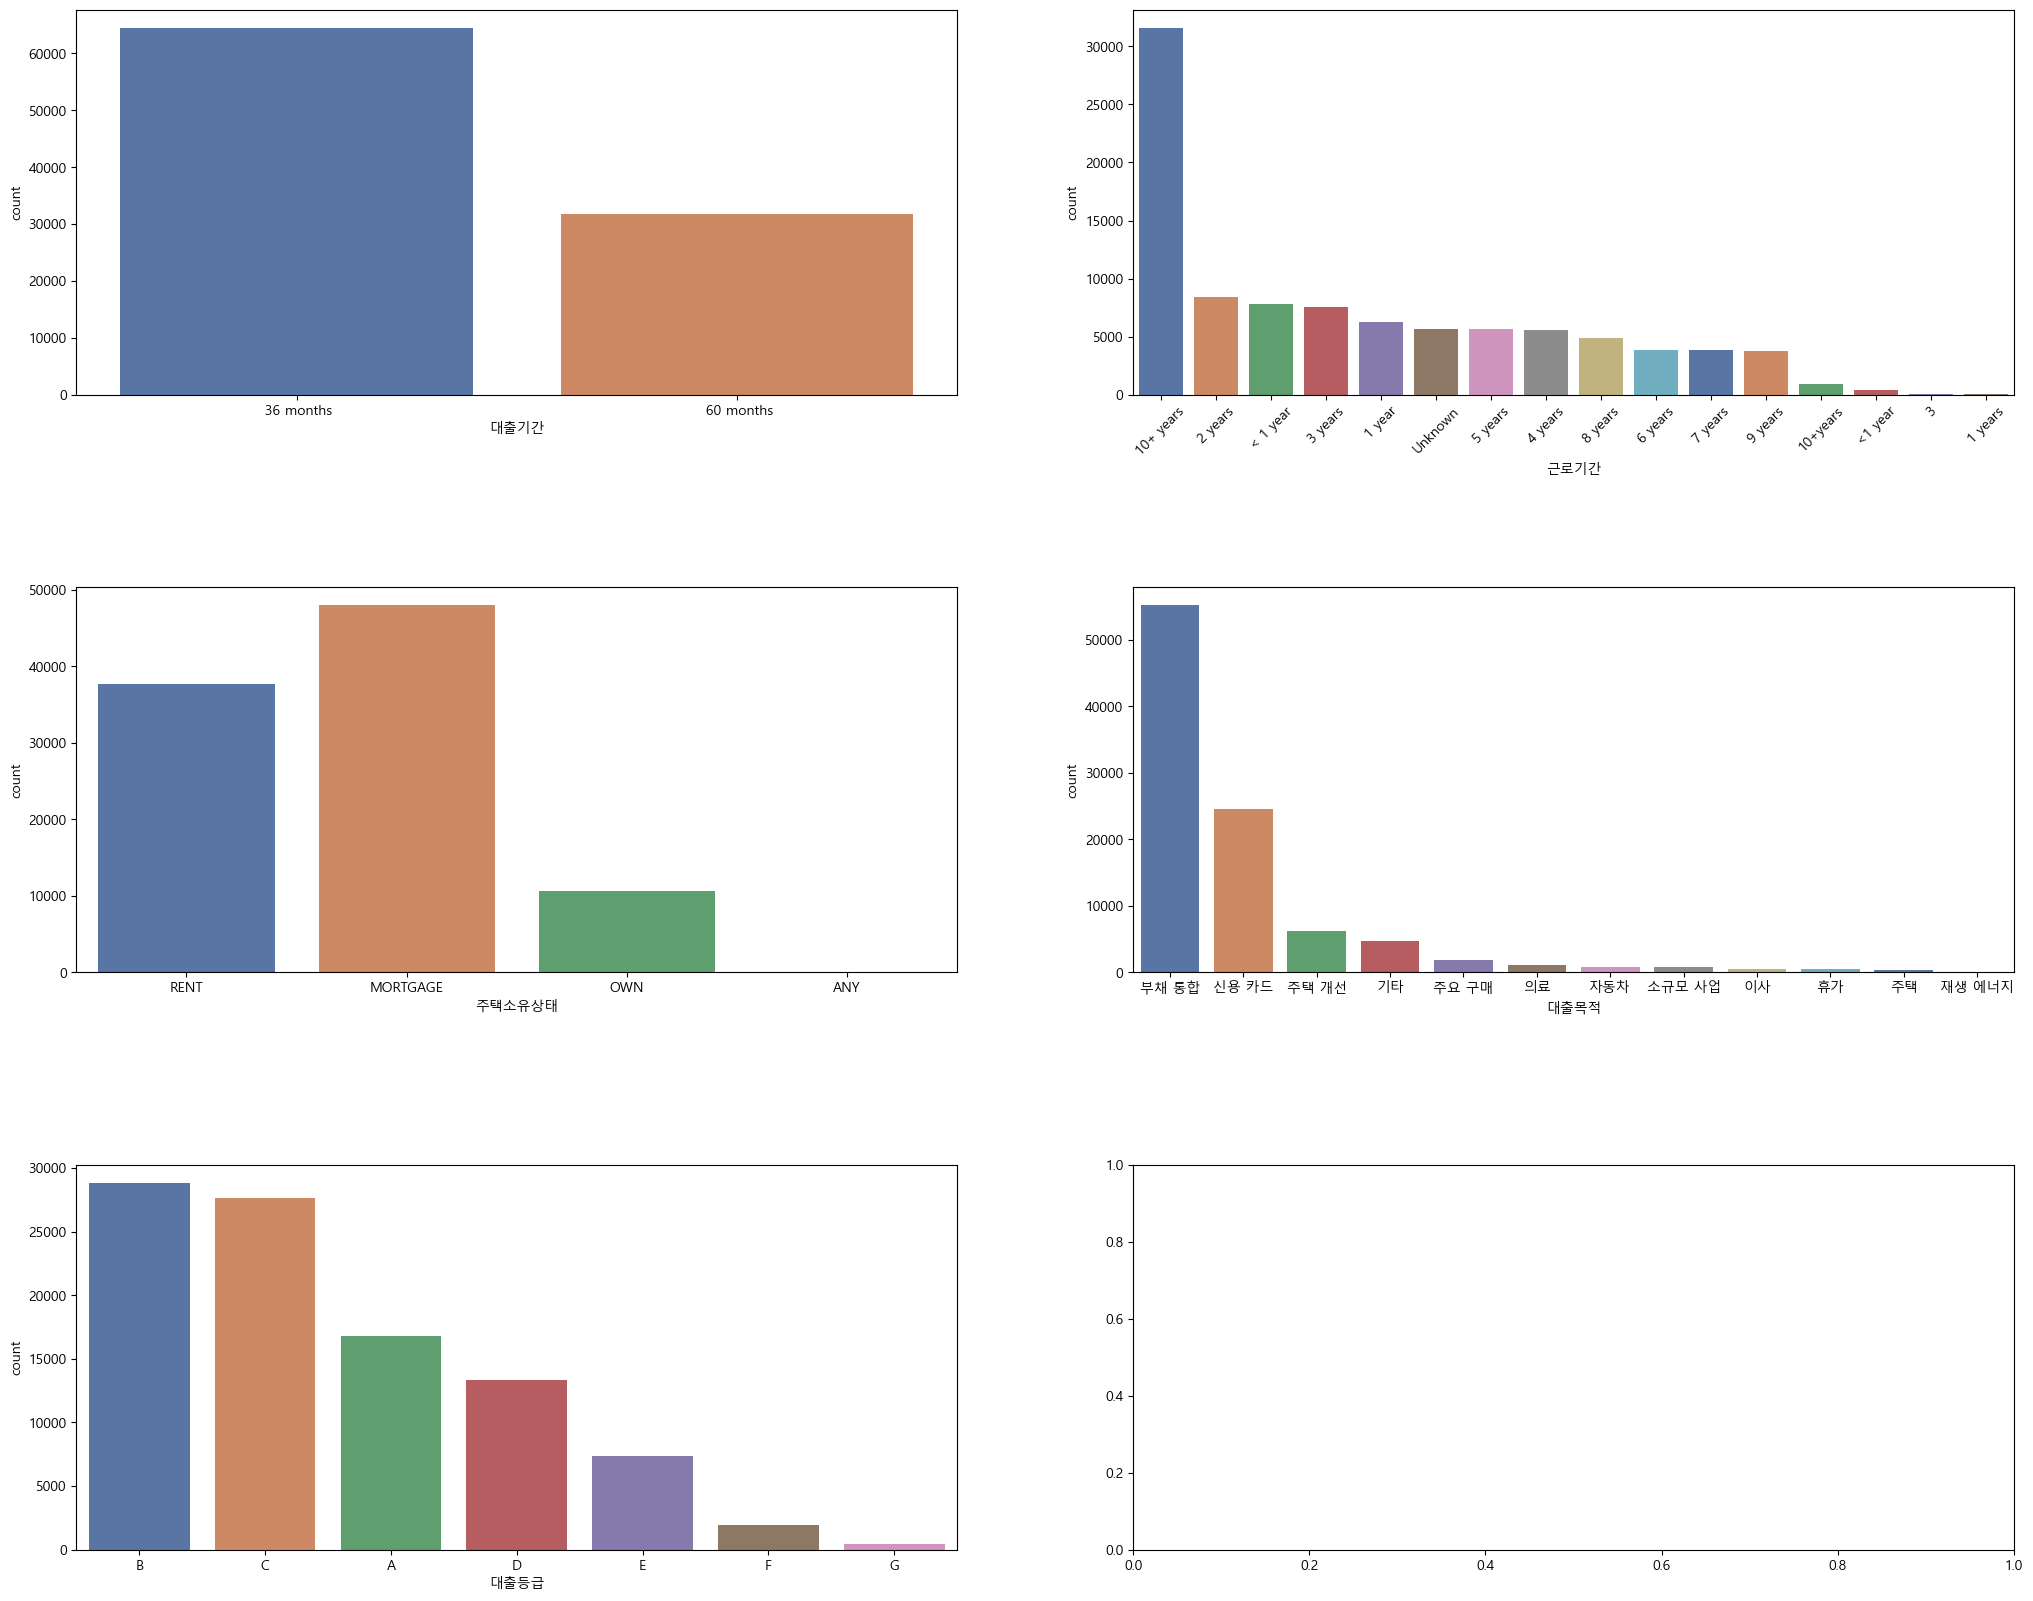

In [8]:
# 이산형 변수 시각화

fig, axes = plt.subplots(3, 2, figsize=(25,20))

plt.subplots_adjust(hspace=0.5)


sns.countplot(x='대출기간', data=train_df, ax=axes[0][0], palette='deep')
ax_working_period = sns.countplot(x='근로기간', data=train_df, order=train_df.근로기간.value_counts().index, ax=axes[0][1], palette='deep')
ax_working_period.set_xticklabels(ax_working_period.get_xticklabels(), rotation=45)
sns.countplot(x='주택소유상태', data=train_df, ax=axes[1][0], palette='deep')
sns.countplot(x='대출목적', data=train_df, order=train_df.대출목적.value_counts().index, ax=axes[1][1], palette='deep')
sns.countplot(x='대출등급', data=train_df, order=train_df.대출등급.value_counts().index, ax=axes[2][0], palette='deep')

<Axes: >

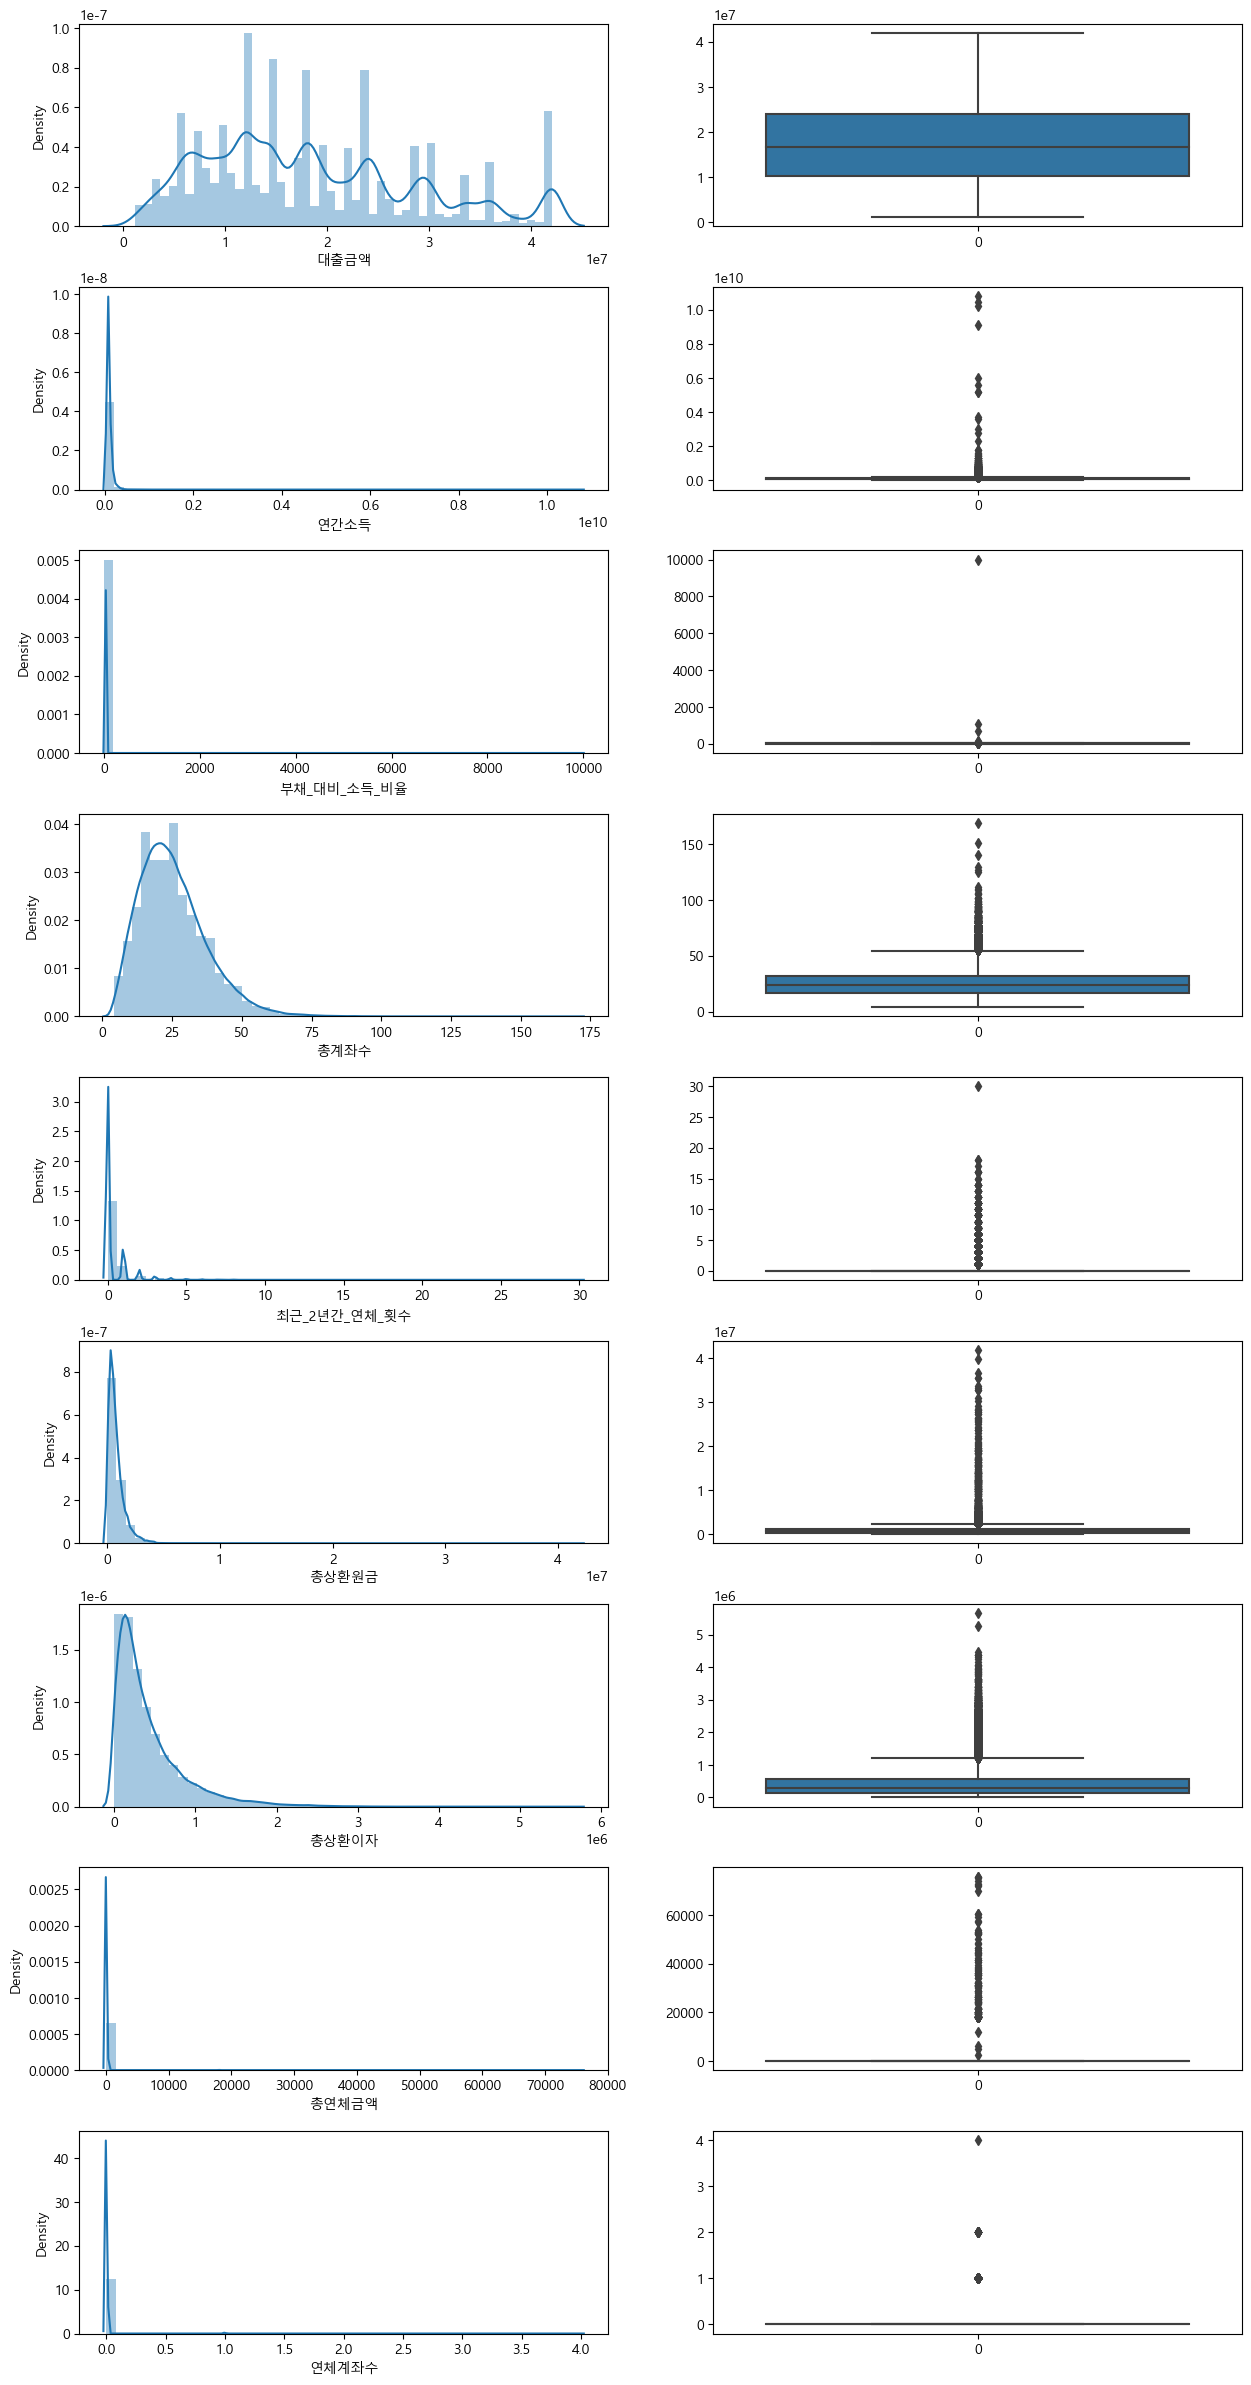

In [9]:
# 연속형 변수 distplot, boxplot

fig, axes = plt.subplots(9,2, figsize=(15,30)) # 2x2 형식으로 4개 그래프 동시에 표시
plt.subplots_adjust(hspace=0.3)

sns.distplot(train_df['대출금액'], ax=axes[0][0])
sns.boxplot(train_df['대출금액'], ax=axes[0][1])

sns.distplot(train_df['연간소득'], ax=axes[1][0])
sns.boxplot(train_df['연간소득'], ax=axes[1][1])

sns.distplot(train_df['부채_대비_소득_비율'], ax=axes[2][0])
sns.boxplot(train_df['부채_대비_소득_비율'], ax=axes[2][1])

sns.distplot(train_df['총계좌수'], ax=axes[3][0])
sns.boxplot(train_df['총계좌수'], ax=axes[3][1])

sns.distplot(train_df['최근_2년간_연체_횟수'], ax=axes[4][0])
sns.boxplot(train_df['최근_2년간_연체_횟수'], ax=axes[4][1])

sns.distplot(train_df['총상환원금'], ax=axes[5][0])
sns.boxplot(train_df['총상환원금'], ax=axes[5][1])

sns.distplot(train_df['총상환이자'], ax=axes[6][0])
sns.boxplot(train_df['총상환이자'], ax=axes[6][1])

sns.distplot(train_df['총연체금액'], ax=axes[7][0])
sns.boxplot(train_df['총연체금액'], ax=axes[7][1])

sns.distplot(train_df['연체계좌수'], ax=axes[8][0])
sns.boxplot(train_df['연체계좌수'], ax=axes[8][1])

In [10]:
train_df[train_df.연간소득==0]

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
12498,TRAIN_12498,4440000,36 months,Unknown,MORTGAGE,0,9999.0,20,신용 카드,2,205356,85884.0,0.0,0.0,C


In [11]:
# 연속형 변수 대출등급별 평균

train_df_continuous = train_df.drop(['ID','대출기간','근로기간','주택소유상태','대출목적'], axis=1)
train_df_continuous_group = train_df_continuous.groupby('대출등급').mean()
train_df_continuous_group

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
대출등급,,,,,,,,,
A,1.790579e+07,1.124911e+08,16.547850,26.910684,0.218698,1.066966e+06,2.240085e+05,14.806105,0.001133
B,1.686808e+07,9.570640e+07,18.129529,25.223375,0.365409,8.340144e+05,3.033410e+05,29.441371,0.004789
C,1.789004e+07,8.903804e+07,20.270095,24.695073,0.380299,7.521078e+05,4.306745e+05,48.052565,0.007892
D,1.953331e+07,8.359673e+07,21.808465,24.705107,0.384379,7.297173e+05,6.117896e+05,113.352104,0.008462
E,2.232013e+07,8.492864e+07,22.248466,25.320642,0.349334,7.074507e+05,8.146975e+05,94.572206,0.007615
F,2.400517e+07,8.434506e+07,21.853710,25.543501,0.361822,6.673177e+05,1.095274e+06,237.801433,0.006653
G,2.402079e+07,8.258034e+07,20.691952,24.550000,0.416667,5.870190e+05,1.284655e+06,329.942857,0.004762


<Axes: xlabel='대출등급', ylabel='연체계좌수'>

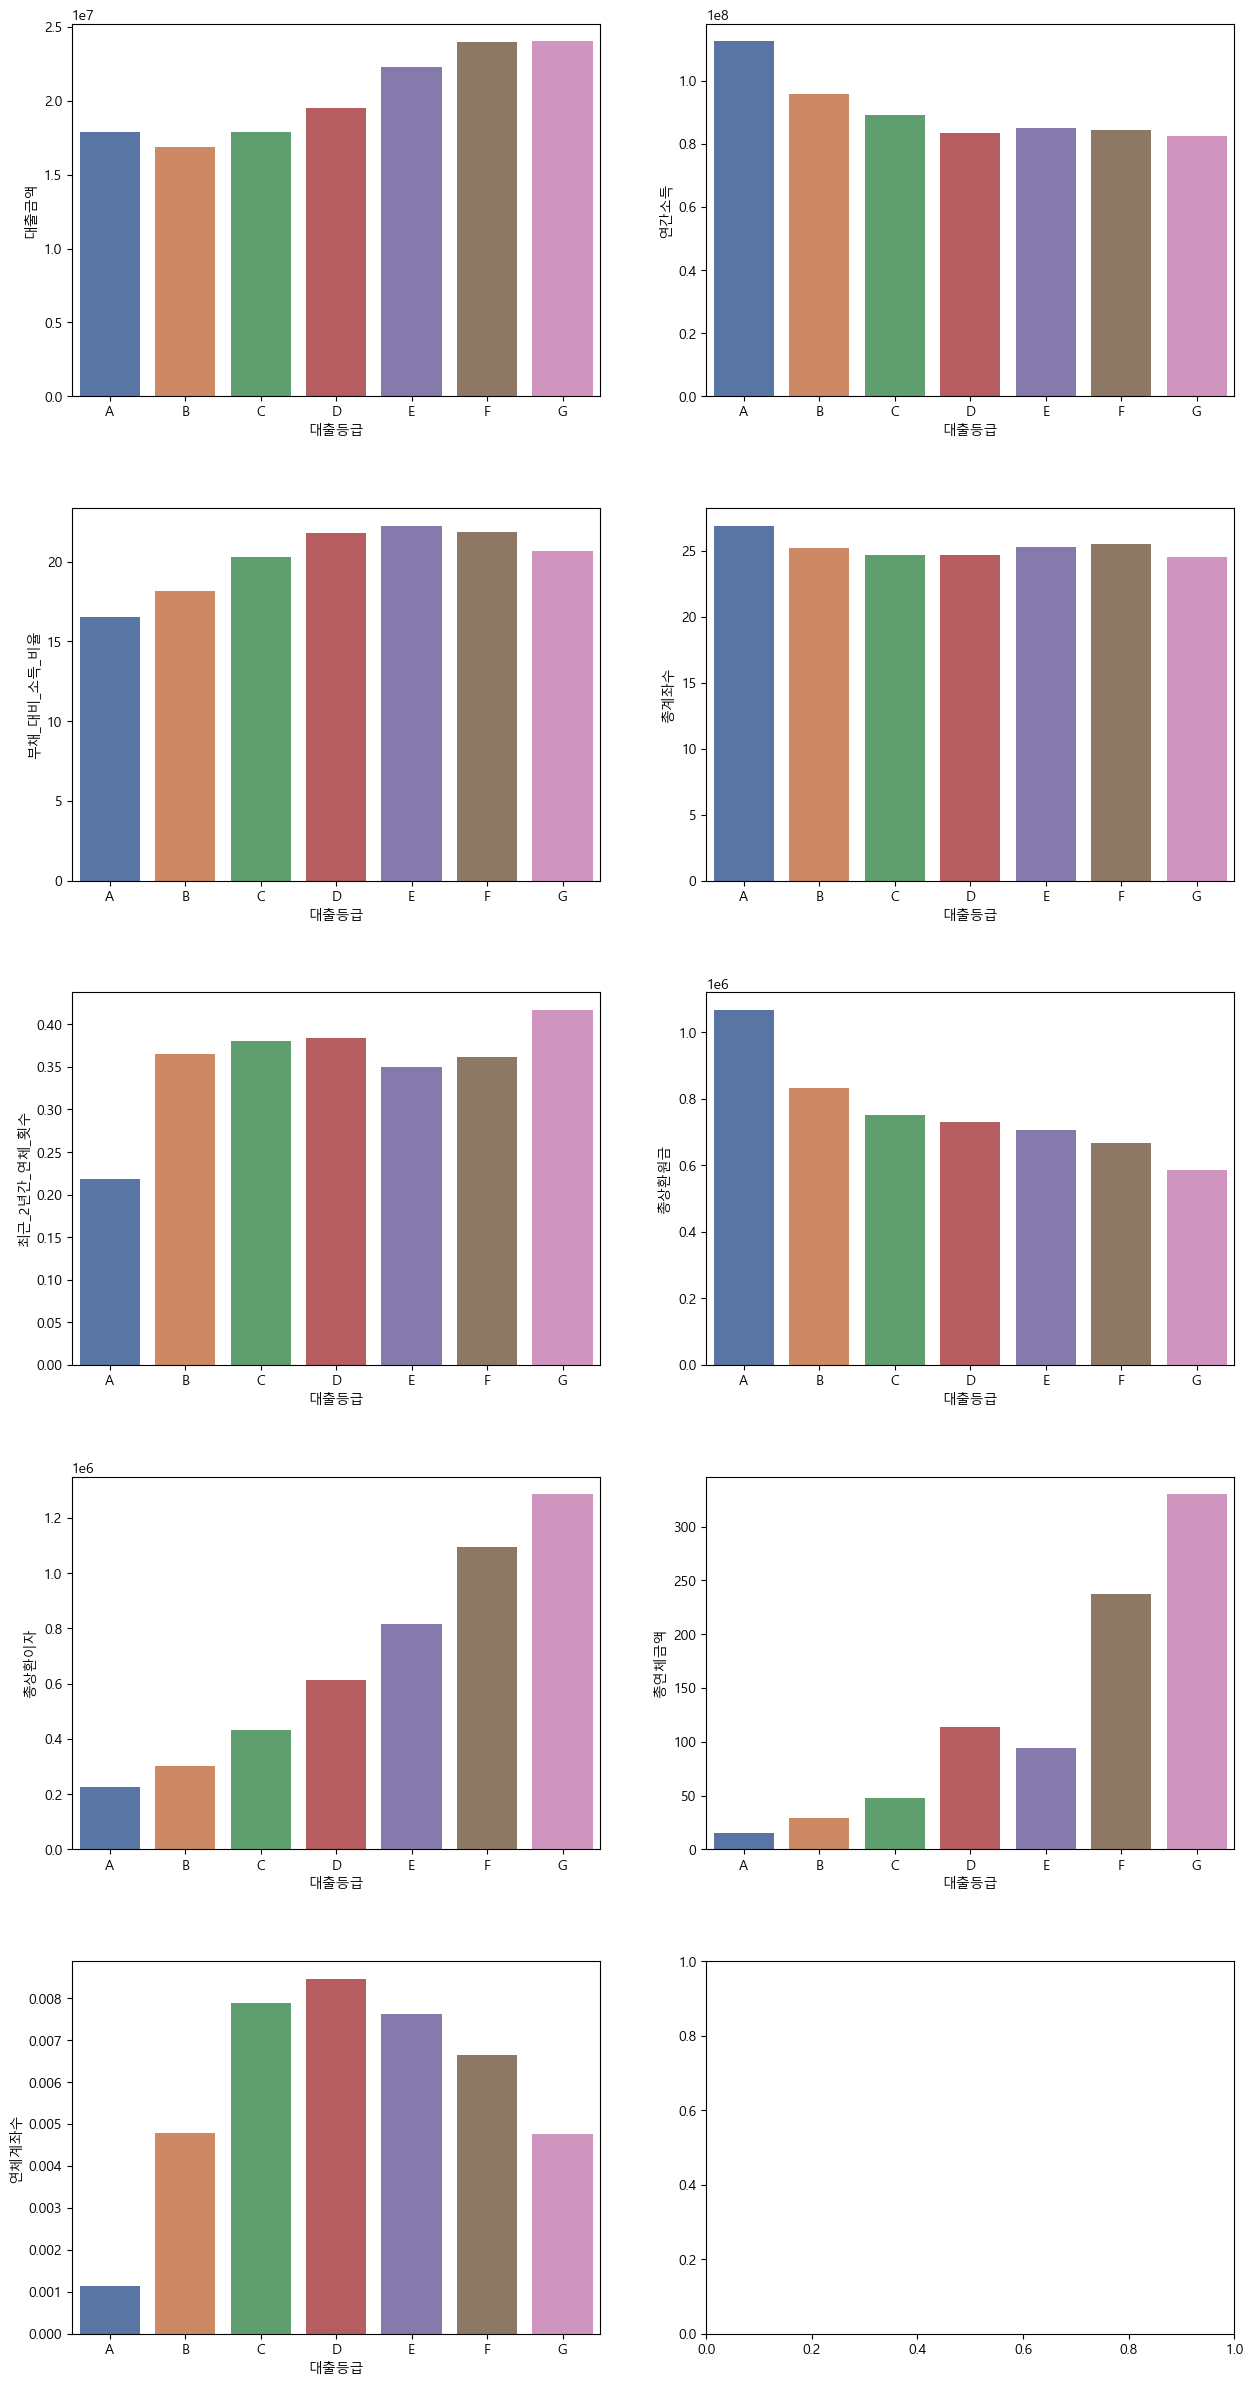

In [12]:
# 연속형 변수 대출등급별 평균 시각화

fig, axes = plt.subplots(5,2, figsize=(15,30)) # 2x2 형식으로 4개 그래프 동시에 표시
plt.subplots_adjust(hspace=0.3)

sns.barplot(x=train_df_continuous_group.index, y='대출금액', data=train_df_continuous_group, palette='deep', ax=axes[0][0])
sns.barplot(x=train_df_continuous_group.index, y='연간소득', data=train_df_continuous_group, palette='deep', ax=axes[0][1])
sns.barplot(x=train_df_continuous_group.index, y='부채_대비_소득_비율', data=train_df_continuous_group, palette='deep', ax=axes[1][0])
sns.barplot(x=train_df_continuous_group.index, y='총계좌수', data=train_df_continuous_group, palette='deep', ax=axes[1][1])
sns.barplot(x=train_df_continuous_group.index, y='최근_2년간_연체_횟수', data=train_df_continuous_group, palette='deep', ax=axes[2][0])
sns.barplot(x=train_df_continuous_group.index, y='총상환원금', data=train_df_continuous_group, palette='deep', ax=axes[2][1])
sns.barplot(x=train_df_continuous_group.index, y='총상환이자', data=train_df_continuous_group, palette='deep', ax=axes[3][0])
sns.barplot(x=train_df_continuous_group.index, y='총연체금액', data=train_df_continuous_group, palette='deep', ax=axes[3][1])
sns.barplot(x=train_df_continuous_group.index, y='연체계좌수', data=train_df_continuous_group, palette='deep', ax=axes[4][0])

In [13]:
train_df_continuous

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,12480000,72000000,18.90,15,0,0,0.0,0.0,0.0,C
1,14400000,130800000,22.33,21,0,373572,234060.0,0.0,0.0,B
2,12000000,96000000,8.60,14,0,928644,151944.0,0.0,0.0,A
3,14400000,132000000,15.09,15,0,325824,153108.0,0.0,0.0,C
4,18000000,71736000,25.39,19,0,228540,148956.0,0.0,0.0,B
...,...,...,...,...,...,...,...,...,...,...
96289,14400000,210000000,9.33,33,0,974580,492168.0,0.0,0.0,C
96290,28800000,132000000,5.16,25,0,583728,855084.0,0.0,0.0,E
96291,14400000,84000000,11.24,22,0,1489128,241236.0,0.0,0.0,A
96292,15600000,66330000,17.30,21,2,1378368,818076.0,0.0,0.0,D


In [14]:
# 연속형 변수 목록
continuous_vars = [
    '대출금액', '연간소득', '부채_대비_소득_비율', '총계좌수', 
    '최근_2년간_연체_횟수', '총상환원금', '총상환이자', '총연체금액', '연체계좌수'
]

# 대출등급의 고유한 범주
loan_grades = train_df['대출등급'].unique()

# 각 연속형 변수에 대해 ANOVA 수행
for var in continuous_vars:
    # 각 대출등급에 대한 변수 값들을 저장할 리스트
    groups = []
    
    # 대출등급별로 데이터 그룹화 및 해당 변수 값 수집
    for grade in loan_grades:
        groups.append(train_df[train_df['대출등급'] == grade][var].values)
    
    # ANOVA 수행
    f_stat, p_value = f_oneway(*groups)
    
    # 결과 출력
    print(f"변수 '{var}'의 ANOVA 결과: F-statistic = {f_stat}, P-value = {p_value}")

변수 '대출금액'의 ANOVA 결과: F-statistic = 454.3271368433495, P-value = 0.0
변수 '연간소득'의 ANOVA 결과: F-statistic = 149.05982829818112, P-value = 4.816027990915244e-189
변수 '부채_대비_소득_비율'의 ANOVA 결과: F-statistic = 52.4368425863605, P-value = 7.71758001370164e-65
변수 '총계좌수'의 ANOVA 결과: F-statistic = 67.41751230341224, P-value = 4.552665738933169e-84
변수 '최근_2년간_연체_횟수'의 ANOVA 결과: F-statistic = 66.8557345236643, P-value = 2.3985329094228896e-83
변수 '총상환원금'의 ANOVA 결과: F-statistic = 228.14375690297203, P-value = 1.610696070744567e-290
변수 '총상환이자'의 ANOVA 결과: F-statistic = 4205.829962669025, P-value = 0.0
변수 '총연체금액'의 ANOVA 결과: F-statistic = 16.773943224244498, P-value = 1.8870315848816592e-19
변수 '연체계좌수'의 ANOVA 결과: F-statistic = 16.603108586261282, P-value = 3.0861763890808586e-19


# test_df EDA

<Axes: xlabel='대출목적', ylabel='count'>

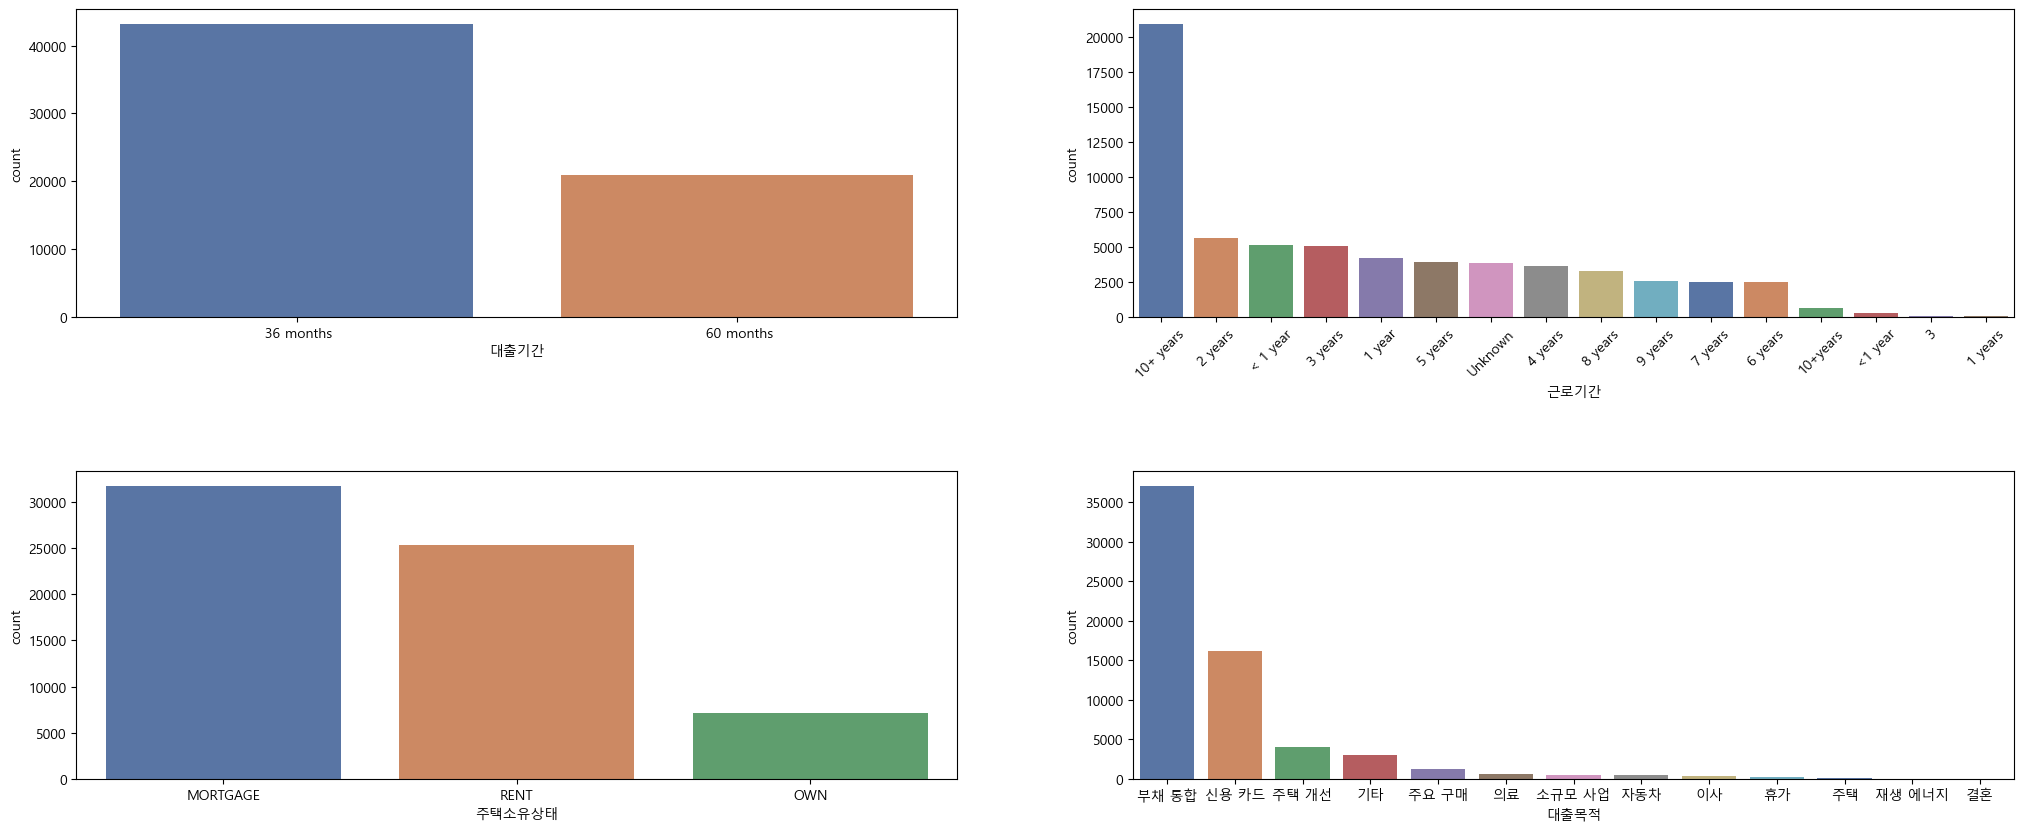

In [17]:
# 이산형 변수 시각화

fig, axes = plt.subplots(2, 2, figsize=(25,10))

plt.subplots_adjust(hspace=0.5)


sns.countplot(x='대출기간', data=test_df, ax=axes[0][0], palette='deep')
ax_working_period = sns.countplot(x='근로기간', data=test_df, order=test_df.근로기간.value_counts().index, ax=axes[0][1], palette='deep')
ax_working_period.set_xticklabels(ax_working_period.get_xticklabels(), rotation=45)
sns.countplot(x='주택소유상태', data=test_df, ax=axes[1][0], palette='deep')
sns.countplot(x='대출목적', data=test_df, order=test_df.대출목적.value_counts().index, ax=axes[1][1], palette='deep')

<Axes: >

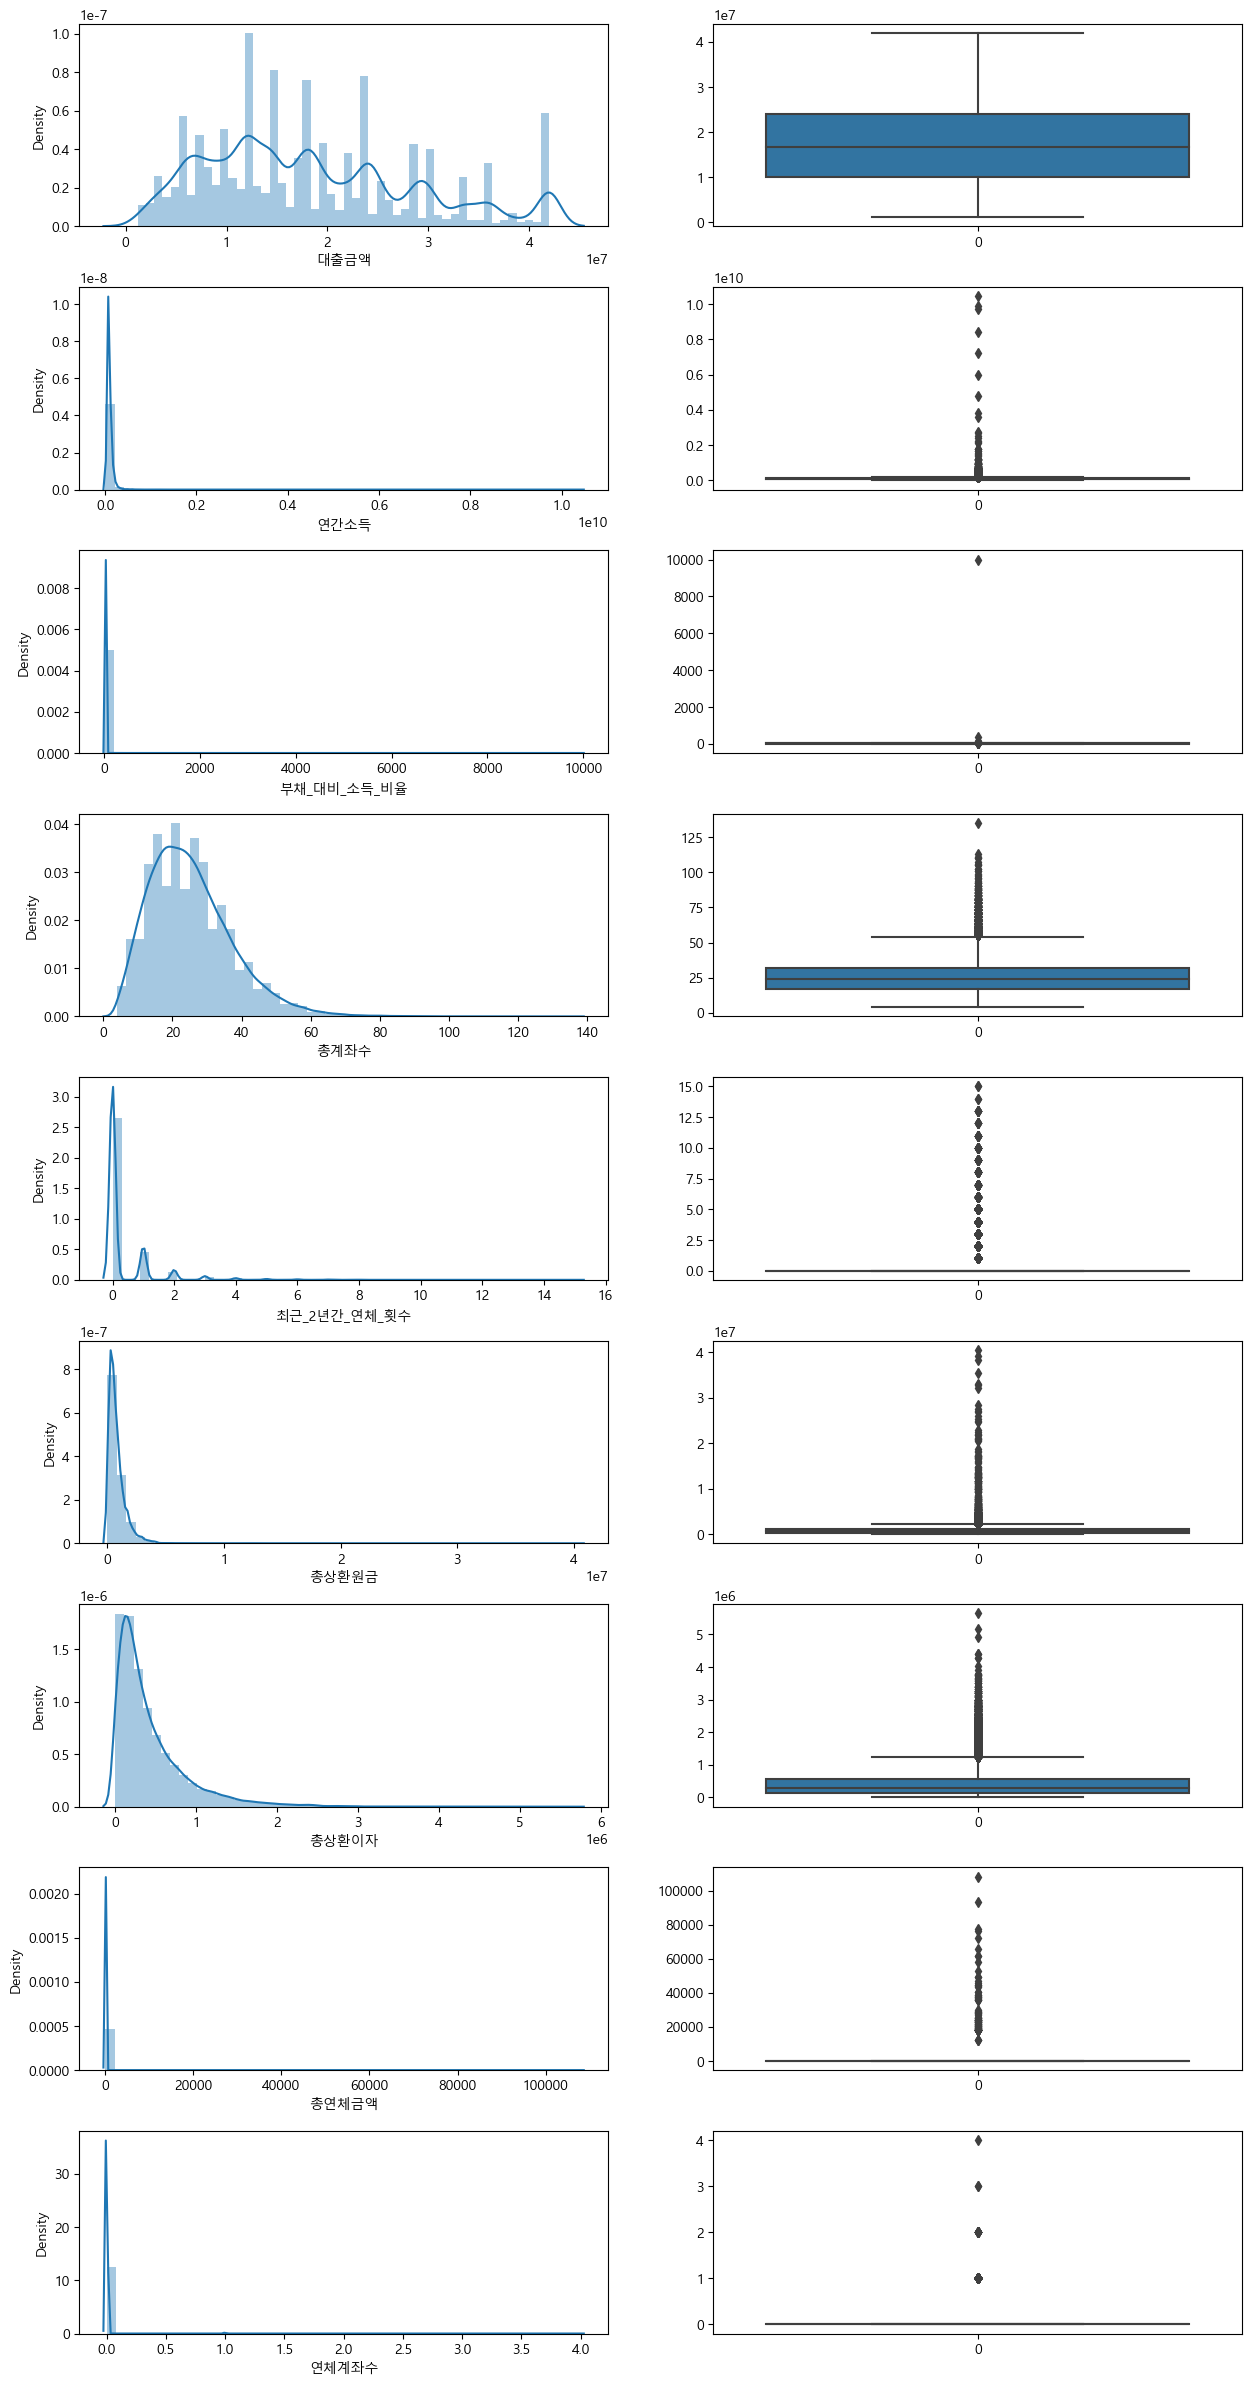

In [18]:
# 연속형 변수 distplot, boxplot

fig, axes = plt.subplots(9,2, figsize=(15,30)) # 2x2 형식으로 4개 그래프 동시에 표시
plt.subplots_adjust(hspace=0.3)

sns.distplot(test_df['대출금액'], ax=axes[0][0])
sns.boxplot(test_df['대출금액'], ax=axes[0][1])

sns.distplot(test_df['연간소득'], ax=axes[1][0])
sns.boxplot(test_df['연간소득'], ax=axes[1][1])

sns.distplot(test_df['부채_대비_소득_비율'], ax=axes[2][0])
sns.boxplot(test_df['부채_대비_소득_비율'], ax=axes[2][1])

sns.distplot(test_df['총계좌수'], ax=axes[3][0])
sns.boxplot(test_df['총계좌수'], ax=axes[3][1])

sns.distplot(test_df['최근_2년간_연체_횟수'], ax=axes[4][0])
sns.boxplot(test_df['최근_2년간_연체_횟수'], ax=axes[4][1])

sns.distplot(test_df['총상환원금'], ax=axes[5][0])
sns.boxplot(test_df['총상환원금'], ax=axes[5][1])

sns.distplot(test_df['총상환이자'], ax=axes[6][0])
sns.boxplot(test_df['총상환이자'], ax=axes[6][1])

sns.distplot(test_df['총연체금액'], ax=axes[7][0])
sns.boxplot(test_df['총연체금액'], ax=axes[7][1])

sns.distplot(test_df['연체계좌수'], ax=axes[8][0])
sns.boxplot(test_df['연체계좌수'], ax=axes[8][1])

In [ ]:
train_df.대출목적.value_counts()

In [ ]:
test_df.근로기간.value_counts()

In [ ]:
# 연속형 변수 distplot, boxplot

fig, axes = plt.subplots(9,2, figsize=(15,30)) # 2x2 형식으로 4개 그래프 동시에 표시
plt.subplots_adjust(hspace=0.3)

sns.distplot(test_df['대출금액'], ax=axes[0][0])
sns.boxplot(test_df['대출금액'], ax=axes[0][1])

sns.distplot(test_df['연간소득'], ax=axes[1][0])
sns.boxplot(test_df['연간소득'], ax=axes[1][1])

sns.distplot(test_df['부채_대비_소득_비율'], ax=axes[2][0])
sns.boxplot(test_df['부채_대비_소득_비율'], ax=axes[2][1])

sns.distplot(test_df['총계좌수'], ax=axes[3][0])
sns.boxplot(test_df['총계좌수'], ax=axes[3][1])

sns.distplot(test_df['최근_2년간_연체_횟수'], ax=axes[4][0])
sns.boxplot(test_df['최근_2년간_연체_횟수'], ax=axes[4][1])

sns.distplot(test_df['총상환원금'], ax=axes[5][0])
sns.boxplot(test_df['총상환원금'], ax=axes[5][1])

sns.distplot(test_df['총상환이자'], ax=axes[6][0])
sns.boxplot(test_df['총상환이자'], ax=axes[6][1])

sns.distplot(test_df['총연체금액'], ax=axes[7][0])
sns.boxplot(test_df['총연체금액'], ax=axes[7][1])

sns.distplot(test_df['연체계좌수'], ax=axes[8][0])
sns.boxplot(test_df['연체계좌수'], ax=axes[8][1])

# 추가 분석

In [ ]:
train_df['대출기간']

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
plt.subplots_adjust(hspace=0.3)

grade_index = np.sort(train_df['대출등급'].unique())
sns.countplot(x='대출등급', data=train_df, ax=axes[0][0], order=grade_index, hue=train_df['대출기간'])
sns.countplot(x='대출등급', data=train_df, ax=axes[0][1], order=grade_index, hue=train_df['근로기간'])
sns.countplot(x='대출등급', data=train_df, ax=axes[1][0], order=grade_index, hue=train_df['주택소유상태'])
sns.countplot(x='대출등급', data=train_df, ax=axes[1][1], order=grade_index, hue=train_df['대출목적'])


axes[0,0].set_title("대출기간")
axes[0,1].set_title("근로기간")
axes[1,0].set_title("주택소유상태")
axes[1,1].set_title("대출목적")


In [ ]:
train_df.근로기간.value_counts()